# Le-Net 1 based architecture

We start with 41X41 (I) after first convolution (9x9)we have 33X33 (L1). The next pooling layer reduces dimension with 3 to an output image of 11X11 with 4x4 pooling kernels (L2). Then we apply different types of convolution 4x4 kernels on the L2 layer resulting in 8x8 (L3) . Then followed by pooling 2X2 resulting in 4x4 output map (L4). So we have 16 connection for each element in layer L4 (which depend on the amount of different Covolutions in L3) 


\begin{equation}
f(x)=\frac{1}{1+e^{-x}} \\
F_{k}= f( \sum_{i} \mathbf{W^{k}_{i} \cdot y_{i}}-b_{k})
\end{equation}


\begin{equation}
E=\sum_{k} \frac{1}{2}|t_k-F_{k}|^{2} \\
\Delta W_{ij}= - \eta \frac{dE}{d W_{ij}}
\end{equation}

\begin{equation}
\Delta W_{ij}= \sum_{k} - \eta \frac{dE}{d F_{k}} \frac{dF_{k}}{dx_{k}} \frac{dx_{k}}{dW_{ij}}=\sum_{k} \eta (t_{k}-F_{k})\frac{e^{-x_{k}}}{(1+e^{-x_{k}})^{2}} \frac{dx_{k}}{dW_{ij}} \\
= \eta (t_{k}-F_{k})\frac{e^{-x_{k}}}{(1+e^{-x_{k}})^{2}} y_{ij}
\end{equation}

\begin{equation}
\Delta b_{k}= - \eta \frac{dE}{d F_{k}} \frac{dF_{k}}{dx_{k}} \frac{dx_{k}}{b_{k}}=\eta (t_{k}-F_{k})\frac{e^{-x_{k}}}{(1+e^{-x_{k}})^{2}} \cdot-1
\end{equation}

Since $\frac{e^{-x_{k}}}{(1+e^{-x_{k}})^{2}}$ is always positive we can neglect this term in our programme

\begin{equation}
x_{k}=\sum_{ij} W^{k}[i,j] \; y^{4rb}[i,j] - b_{k}
\end{equation}

\begin{equation}
y^{4rb}[i,j]= \sum_{u,v} W^{3rb}[u,v] \; y^{3rb} [2i+u,2j+v]
\end{equation}

\begin{equation}
y^{3rb} [2i+u,2j+v]= f\left (x^{3rb}[2i+u,2j+v] \right)
\end{equation}

\begin{equation}
x^{3rb}[2i+u,2j+v]=\sum_{nm} W^{2rb}[n,m] \; y^{2rb}[n+(2i+u),m+(2j+v)] -b^{3rb}[2i+u,2j+v]
\end{equation}

\begin{equation}
\begin{split}
\Delta W^{2rb}[n,m] =\sum_{k} - \eta  \frac{dE}{dF_{k}} 
\frac{dF_{k}}{dx_{k}} 
\sum_{ij} \frac{dx_{k}}{dy^{4rb}[i,j]} 
 \sum_{uv}\frac{dy^{4rb}[i,j]}{d y^{3rb} [2i+u,2j+v]} 
\frac{d y^{3rb} [2i+u,2j+v]}{d x^{3rb}[2i+u,2j+v]}
\sum_{nm}\frac{d x^{3rb}[2i+u,2j+v]}{d W^{2rb}[n,m]}
\end{split}
\end{equation}

\begin{equation}
\begin{split}
\Delta b^{3rb}[2i+u,2j+v] =\sum_{k} - \eta  \frac{dE}{dF_{k}} 
\frac{dF_{k}}{dx_{k}} 
\sum_{ij} \frac{dx_{k}}{dy^{4rb}[i,j]} 
 \sum_{uv}\frac{dy^{4rb}[i,j]}{d y^{3rb} [2i+u,2j+v]} 
\frac{d y^{3rb} [2i+u,2j+v]}{d x^{3rb}[2i+u,2j+v]}
\frac{d x^{3rb}[2i+u,2j+v]}{d b^{3rb}[2i+u,2j+v]}
\end{split}
\end{equation}

\begin{equation}
    \frac{dx_{k}}{dy^{4rb}[i,j]} = W^{4rbk}[i,j]\\
\end{equation}

\begin{equation}
    \frac{dy^{4rb}[i,j]}{d y^{3rb} [2i+u,2j+v]} = W^{3rb}[u,v] \\
 \end{equation}
 

\begin{equation}
\frac{d y^{3rb} [2i+u,2j+v]}{d x^{3rb}[2i+u,2j+v]}=\frac{e^{-x^{3rb}[2i+u,2j+v]}}{(1+e^{-x^{3rb}[2i+u,2j+v]})^2}
\end{equation}
This term is first not included since it is always positive. If the training will not converge it might be possible to include this term

 \begin{equation}
    \frac{d y^{3rb} [2i+u,2j+v]}{d W^{2rb}[n,m]}= y^{2rb} [n+(2i+u),m+(2j+v)] \\
\end{equation}

\begin{equation}
\frac{d x^{3rb}[2i+u,2j+v]}{d b^{3rb}[2i+u,2j+v]}=-1
\end{equation}

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy import linalg as lin
import scipy.signal as sig
from PIL import Image
import glob
import matplotlib.cm as cm
import itertools

In [3]:
########### Load Input ############################################################################################################################
# In this script I used the brightness to determine structures, instead of one RGB color:
# this is determined by: 0.2126*R + 0.7152*G + 0.0722*B
# Source: https://en.wikipedia.org/wiki/Relative_luminance

patchSize=41 # patchsize this must be 48 since our network can only handle this value

# Open forest
Amount_data= len(glob.glob('Forest/F*'))
dataPatchedF=[]
dataF_RGB=[]

for k in range (0, Amount_data):
    name="Forest/F%d.png" % (k+1)
    img = Image.open(name)
    data=img.convert('RGB')
    data= np.asarray( data, dtype="int32" )
    data=0.2126*data[:,:,0]+0.7152*data[:,:,1]+0.0722*data[:,:,2]
    data2=img.convert('RGB')
    data2= np.asarray( data2, dtype="int32" )

    Yamount=data.shape[0]/patchSize # Counts how many times the windowsize fits in the picture
    Xamount=data.shape[1]/patchSize # Counts how many times the windowsize fits in the picture
    dataPatchedF.append(np.array([[data[j*patchSize:(j+1)*patchSize,i*patchSize:(i+1)*patchSize] for i in range(0,Xamount)] for j in range(0,Yamount)]))
    for m in range(0,3):
        dataF_RGB.append(np.array([[data2[j*patchSize:(j+1)*patchSize,i*patchSize:(i+1)*patchSize,m] for i in range(0,Xamount)] for j in range(0,Yamount)]))

# Open city
Amount_data= len(glob.glob('City/C*'))
dataPatchedC=[]
dataC_RGB=[]

for k in range (0, Amount_data):
    name="City/C%d.png" % (k+1)
    img = Image.open(name)
    data=img.convert('RGB')
    data = np.asarray( data, dtype="int32" )
    data=0.2126*data[:,:,0]+0.7152*data[:,:,1]+0.0722*data[:,:,2]
    data2=img.convert('RGB')
    data2= np.asarray( data2, dtype="int32" )

    Yamount=data.shape[0]/patchSize # Counts how many times the windowsize fits in the picture
    Xamount=data.shape[1]/patchSize # Counts how many times the windowsize fits in the picture    
    dataPatchedC.append(np.array([[data[j*patchSize:(j+1)*patchSize,i*patchSize:(i+1)*patchSize] for i in range(0,Xamount)] for j in range(0,Yamount)]))
    for m in range(0,3):
        dataC_RGB.append(np.array([[data2[j*patchSize:(j+1)*patchSize,i*patchSize:(i+1)*patchSize,m] for i in range(0,Xamount)] for j in range(0,Yamount)]))

# Open water
dataPatchedW=[]
Amount_data= len(glob.glob('Water/W*'))
dataW_RGB=[]

for k in range (0, Amount_data): 
    name="Water/W%d.png" % (k+1)
    img = Image.open(name)
    data=img.convert('RGB')
    data = np.asarray( data, dtype="int32" )
    data=0.2126*data[:,:,0]+0.7152*data[:,:,1]+0.0722*data[:,:,2]   
    Yamount=data.shape[0]/patchSize # Counts how many times the windowsize fits in the picture
    Xamount=data.shape[1]/patchSize # Counts how many times the windowsize fits in the picture
    dataPatchedW.append(np.array([[data[j*patchSize:(j+1)*patchSize,i*patchSize:(i+1)*patchSize] for i in range(0,Xamount)] for j in range(0,Yamount)])) 
    #for m in range(0,3):
        # dataW_t=np.array([[data2[j*patchSize:(j+1)*patchSize,i*patchSize:(i+1)*patchSize,m] for i in range(0,Xamount)] for j in range(0,Yamount)]))
        

In [4]:
A=np.array([[data2[j*patchSize:(j+1)*patchSize,i*patchSize:(i+1)*patchSize,m] for i in range(0,Xamount)] for j in range(0,Yamount)])

In [5]:
A.shape

(13, 32, 41, 41)

In [6]:
########### Functions ############################################################################################################################

# Define Activitation functions, pooling and convolution functions (the rules)

def Sigmoid(x): 
    return (1/(1+np.exp(-x)))

def Sigmoid_dx(x):
    return np.exp(-x)/((1+np.exp(-x))**2)

def TanH(x):
    return (1-np.exp(-x))/(1+np.exp(-x))


def Pool(I,W):
    PoolImg=np.zeros((len(I)/len(W),len(I)/len(W))) # W must fit an integer times into I.
    for i in range(0,len(PoolImg)):
        for j in range(0,len(PoolImg)):
            SelAr=I[i*len(W):(i+1)*len(W),j*len(W):(j+1)*len(W)]
            PoolImg[i,j]=np.inner(SelAr.flatten(),W.flatten()) # Now this is just an inner product since we have vectors
    return PoolImg

# To automatically make Gaussian kernels
def makeGaussian(size, fwhm = 3, center=None):
    x = np.arange(0, size, 1, float)
    y = x[:,np.newaxis]

    if center is None:
        x0 = y0 = size // 2
    else:
        x0 = center[0]
        y0 = center[1]

    return np.exp(-4*np.log(2) * ((x-x0)**2 + (y-y0)**2) / fwhm**2)

# To automatically define pooling nodes
def Pool_node(N):
    s=(N,N)
    a=float(N)*float(N)
    return (1.0/a)*np.ones(s) 



In [7]:
#################### Define pooling layers ###########################################################################
P12=Pool_node(3)*(1.0/100.0) #factor 1000 added to lower values more
P34=Pool_node(2)*(1.0/100.0) 

#################### Define Convolution layers #######################################################################

######### First C layer #########
C1=[]

## First Kernel

# Inspiration: http://en.wikipedia.org/wiki/Sobel_operator
# http://stackoverflow.com/questions/9567882/sobel-filter-kernel-of-large-size

Kernel=np.array([[4,3,2,1,0,-1,-2,-3,-4],
                 [5,4,3,2,0,-2,-3,-4,-5], 
                 [6,5,4,3,0,-3,-4,-5,-6],
                 [7,6,5,4,0,-4,-5,-6,-7], 
                 [8,7,6,5,0,-5,-6,-7,-8],
                 [7,6,5,4,0,-4,-5,-6,-7],
                 [6,5,4,3,0,-3,-4,-5,-6],
                 [5,4,3,2,0,-2,-3,-4,-5],
                 [4,3,2,1,0,-1,-2,-3,-4]])

C1.append(Kernel)

## Second Kernel
Kernel=np.matrix.transpose(Kernel)
C1.append(Kernel)

##Third Kernel
Kernel=makeGaussian(9,5)
Kernel=(1/np.sum(Kernel))*Kernel
C1.append(Kernel)

######### Initialize output weights and biases #########

# Define the number of branches in one row
N_branches= 3
ClassAmount=3 # Forest, City, Water
Size_C2=4
S_H3=((patchSize-C1[0].shape[0]+1)/P12.shape[1])-Size_C2+1
S_H4=S_H3/P34.shape[1]

C2=np.random.rand(len(C1),N_branches, 4, 4) # second convolution weigths   
W=np.random.rand(ClassAmount, len(C1), N_branches, S_H4, S_H4) # end-weight from output to classifier-neurons
H3_bias=np.random.rand(len(C1),N_branches) #bias in activation function from C2 to H3
Output_bias=np.random.rand(ClassAmount)# bias on the three classes

#learning rates
n_bias=1*10**-2
n_W=1*10**-2
n_C2=1*10**-2
n_H3_bias=1*10**-2
#Labda=5*10**-3


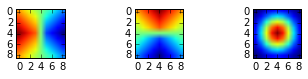

In [8]:
N_plts=len(C1)
for i in range(0,N_plts):
    plt.subplot(4,3,i+1)
    plt.imshow(C1[i])    

# For the extra information regarding the code in the following cell

a random patch is chosen in the following way: the program counts how many files and patches there are in total, then it permutes the sequence so that a random patch is chosen every iteration (forest, city, water). After selecting the number the file has to be found back. 

In [9]:
# Determines total amount of patches and makes it easier to find back the patches
N_F=len(dataPatchedF)
Patches_F=[]
j=0;

#Determines the total amount of patches N_F in forest
for i in range(0,N_F):
    N_ff=dataPatchedF[i].shape[0]*dataPatchedF[i].shape[1]
    Patches_F.append(np.reshape(dataPatchedF[i], (N_ff, patchSize, patchSize)))
    j=j+N_ff
N_F=j

#Determines the total amount of patches N_C in city
N_C=len(dataPatchedC)
Patches_C=[]
j=0;
for i in range(0,N_C):
    N_cc=dataPatchedC[i].shape[0]*dataPatchedC[i].shape[1]
    j=j+N_cc
    Patches_C.append(np.reshape(dataPatchedC[i], (N_cc, patchSize, patchSize)))
N_C=j

#Determines the total amount of patches N_W in water
N_W=len(dataPatchedW)
Patches_W=[]
j=0;
for i in range(0,N_W):
    N_ww=dataPatchedW[i].shape[0]*dataPatchedW[i].shape[1]
    Patches_W.append(np.reshape(dataPatchedW[i], (N_ww, patchSize, patchSize)))
    j=j+N_ww
N_W=j

N_total=N_F+N_C+N_W
Sequence = np.arange(N_total)
Sequence = np.random.permutation(Sequence)

# Make patches tractable
Patches_F = list(itertools.chain.from_iterable(Patches_F))
Patches_F=np.asarray(Patches_F)

Patches_C = list(itertools.chain.from_iterable(Patches_C))
Patches_C=np.asarray(Patches_C)

Patches_W = list(itertools.chain.from_iterable(Patches_W))
Patches_W=np.asarray(Patches_W)



In [10]:
N_F

5382

In [11]:
len(Sequence)

16120

In [12]:
# TRAINING PHASE
delta_H4=np.zeros((len(C1), N_branches, S_H4, S_H4))
delta_H3=np.zeros((len(C1), N_branches, S_H4, S_H4))
from itertools import product
###### Chooses patch and defines label #####
#for PP in range(0,len(Sequence)):
for PP in range(0,1):
    SS=Sequence[PP]
    if SS<N_F:
        Class_label=np.array([1,0,0])
        inputPatch=Patches_F[SS]
    elif(SS>=N_F) and (SS<(N_F+N_C)):
        Class_label=np.array([0,1,0])
        inputPatch=Patches_C[SS-N_F]
    else:
        Class_label=np.array([0,0,1])
        inputPatch=Patches_W[SS-N_F-N_C]      
    ### Layer 1 ###
    H1=[]
    H2=[]
    H3=np.zeros((len(C1), N_branches, S_H3,S_H3))
    H4=np.zeros((len(C1), N_branches, S_H4,S_H4))
    x=np.zeros(ClassAmount)
    f=np.zeros(ClassAmount)
    
    
    II=1
    
    for r in range (0, len(C1)):
        H1.append(sig.convolve(inputPatch, C1[r], 'valid'))
        H2.append(Pool(H1[r], P12))
        #From here on BP trakes place!
        ITER=0
        while II==1: 
            for b in range(0,N_branches):
                H3[r][b]=Sigmoid(sig.convolve(H2[r], C2[r][b],'valid')-H3_bias[r][b])
                H4[r][b]=Pool(H3[r][b],P34)       
    #Now we have 3x3x4x4 inputs, connected to the 3 output nodes 
            for k in range(0,ClassAmount):  
                x[k]=np.inner(H4.flatten(),W[k].flatten())
                f[k]=Sigmoid(x[k]-Output_bias[k])
            f=f/np.sum((f))

            ###### Back-propagation #####
            # First learning the delta's
            e_k=f-Class_label
            delta_k=e_k*Sigmoid_dx(x)
            Output_bias=Output_bias[k]+n_bias*e_k
            for k in range(0, ClassAmount):
                #update weights output layer
                W[k]=W[k]-n_W*delta_k[k]*H4
                #determine delta in Sub-sampling layer that is not trained
                delta_H4=delta_H4+delta_k[k]*W[k]
                #for b in range(0,N_branches):
                    #for r in range(0,len(C1):
                delta_H3=
            ERROR=np.sum((Class_label-f)**2)
            ITER=ITER+1
            if ERROR<0.55 or ITER>2:
                II=0    
            
n_bias=1*10**-2
n_W=1*10**-2
n_C2=1*10**-2
n_H3_bias=1*10**-2
                              

SyntaxError: invalid syntax (<ipython-input-12-3522cb69f233>, line 56)

In [17]:
N_F

5382

In [ ]:
delta_k

In [13]:
Class_label

NameError: name 'Class_label' is not defined

In [14]:
####### Test phase #######
Error_Test=[]
N_correct=0
for PP in range(9000, 10000):
    SS=Sequence[PP]
    if SS<N_F:
        Class_label=np.array([1,0,0])
        inputPatch=Patches_F[SS]
    elif(SS>=N_F) and (SS<(N_F+N_C)):
        Class_label=np.array([0,1,0])
        inputPatch=Patches_C[SS-N_F]
    else:
        Class_label=np.array([0,0,1])
        inputPatch=Patches_W[SS-N_F-N_C]
    ### Layer 1 ###
    H1=[]
    H2=[]
    H3=np.zeros((len(C1), N_branches, S_H3,S_H3))
    H4=np.zeros((len(C1), N_branches, S_H4,S_H4))
    x=np.zeros(ClassAmount)
    f=np.zeros(ClassAmount)
    for r in range (0, len(C1)):
        H1.append(sig.convolve(inputPatch, C1[r], 'valid'))
        H2.append(Pool(H1[r], P12))
        #From here on BP trakes place!
        for b in range(0,N_branches):
            H3[r][b]=Sigmoid(sig.convolve(H2[r], C2[r][b],'valid')-H3_bias[r][b])
            H4[r][b]=Pool(H3[r][b],P34)          
    #Now we have 3x3x4x4 inputs, connected to the 3 output nodes 
    for k in range(0,ClassAmount):  
        x[k]=np.inner(H4.flatten(),W[k].flatten())
        f[k]=Sigmoid(x[k]-Output_bias[k])
    f=f/np.sum((f))
    Error_Test.append(np.sum((Class_label-f)**2))
            ###### Back-propagation #####
            # First learning the delta's
    
    if np.argmax(f)==np.argmax(Class_label):
        print True
        N_correct=N_correct+1
    else:
        print False 

Perc_corr=float(N_correct)/1000
print Perc_corr

True
False
False
True
False
True
False
True
False
True
True
True
True
False
False
False
True
False
False
True
False
False
False
False
True
False
True
False
False
False
False
True
False
False
False
False
True
True
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
True
False
False
True
False
False
False
False
True
True
True
False
True
True
True
True
False
False
False
True
True
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
True
True
False
False
False
False
True
False
False
False
False
False
False
False
True
False
False
True
False
True
True
False
True
False
False
False
True
False
True
False
True
True
False
False
False
False
False
False
True
False
True
True
False
True
True
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
True
True
True
False
True
True
False
False
False
False
False
True


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: RuntimeWarning: overflow encountered in exp


KeyboardInterrupt: 

In [280]:
float(N_correct)/1000

0.324

In [ ]:
    ###### Back-propagation #####
    for k in range(0, ClassAmount):
        #bias[k]=bias[k]-n_bias*(Class_label[k]-f[k])
        for r in range (0, len(C1)):
            for b in range(0,N_branches):
                # W[r][b,k]=W[r][b,k]+n_W*(Class_label[k]-f[k])*H4[r][b]
                for i, j, u, v, n, m in product(range(0,4), range(0,4), range(0,2), range(0,2), range(0,4), range(0,4)):
                    C2[r][b,n,m]=C2[r][b,n,m]+n_C2*(Class_label[k]-f[k])*W[r][b,k,i,j]*H2[r][n+(2*j+u),m+(2*j+v)]
                    H3_bias[r][b,2*i+u,2*j+v]=H3_bias[r][b,2*i+u,2*j+v]-n_H3_bias*(Class_label[k]-f[k])*W[r][b,k,i,j]
    
    print(Class_label,f)
    if (PP%100==0):print(PP)

# save training parameters

In [62]:
with open("C2.txt", 'w') as f:
    f.write(str(C2))
with open("W.txt", 'w') as f:
    f.write(str(W))
with open("H3_bias.txt", 'w') as f:
    f.write(str(H3_bias))
with open("Bias.txt", 'w') as f:
    f.write(str(bias))
            


In [55]:
print Class_label

[0 1 0]
